# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows',1000)

In [3]:
datadir = '/Users/liwangzhi/Documents/GitHub/StartupStrategy/data'
# datadir = 'data'
data_startup = pd.read_stata(datadir+"/all_deals.dta")
data_public = pd.read_stata(datadir+"/all_public_firms.dta")

## EDAV Startup Database

In [4]:
data_startup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72797 entries, 0 to 72796
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   portfoliocompanyid           72797 non-null  int32         
 1   website                      72797 non-null  object        
 2   dealid                       72797 non-null  object        
 3   portfoliocompany             72797 non-null  object        
 4   background                   72797 non-null  object        
 5   investorsbuyersfirms         72797 non-null  object        
 6   portfoliocompanycountry      72797 non-null  object        
 7   dealdescription              72797 non-null  object        
 8   stage                        72797 non-null  object        
 9   dealdate                     72785 non-null  datetime64[ns]
 10  dealcurrency                 72797 non-null  object        
 11  dealsizecurrmn               59675 non-nu

In [5]:
data_startup.head(3)

,portfoliocompanyid,website,dealid,portfoliocompany,background,investorsbuyersfirms,portfoliocompanycountry,dealdescription,stage,dealdate,dealcurrency,dealsizecurrmn,dealsizeusdmn,portfoliocompanystatus,dealstatus,investorcountry,investorregion,investorcity,investorstatecounty,portfoliocompanyregion,portfoliocompanycity,portfoliocompanystatecounty,portfoliocompanywebsite,companyrevenuecurrmn,entryrevenuemultiple,ebitdacurrmn,entryebitdamultiple,investorsbuyersfunds,industryclassification,primaryindustry,subindustries,industryverticals,boughtfromsellersfirms,leadpartners,boardrepresentatives,dealsizeeurmn,acquiredshare,financialadvisorsbuyers,financialadvisorssellers,legaladvisorsbuyers,legaladvisorssellers,has_no_background,incyear,_merge,has_website
0,26178,www.barracuda.com,V114584,"Barracuda Networks, Inc.","Founded in 2002 and based in California, Unite...",Focus Ventures,US,"In September 2006, Barracuda Networks, Inc. ra...",Series D/Round 4,2006-09-26,,NaN,NaN,Realised,Completed,US,North America,Los Altos,CA,North America,Campbell,CA,www.barracuda.com,NaN,NaN,NaN,NaN,Focus Ventures II,Information Technology,IT Security/Cybersecurity,"Storage, IT Security/Cybersecurity, Monitoring...",Cloud Computing,,,,NaN,NaN,,,,,0,2002,matched (3),1
1,26580,www.fleetcor.com,V18681,"FleetCor Technologies, Inc.","Founded in 2000 and based in Georgia, US, Flee...",Bain Capital,US,"In June 2005, FleetCor Technologies raised USD...",Series D/Round 4,2005-06-01,USD,75.0,75.0,Realised,Completed,US,North America,Boston,MA,North America,Atlanta,GA,www.fleetcor.com,NaN,NaN,NaN,NaN,,Information Technology,Software,"e-Financial, Accounting/Finance Software",Processing & Payment Infrastructure,,Andrew Balson,,67.33,NaN,,,,,0,2000,matched (3),1
2,26635,www.leafgroup.com,V4520,Leaf Group Ltd.,"Founded in 2006 and based in California, US, L...","Oak Investment Partners, Generation Partners, ...",US,"In March 2008, returning investors 3i, Generat...",Series D/Round 4,2008-03-24,USD,35.0,35.0,Active,Completed,"US, UK","North America, Europe","Greenwich, Boston, New York, London","CT, MA, NY",North America,Santa Monica,CA,www.leafgroup.com,NaN,NaN,NaN,NaN,"Spectrum Equity Investors V, Oak Investment Pa...",Information Technology,Internet,"Advertising Agencies & Media Buyers, eMarketin...","AdTech, Cloud Computing",,John Hawkins,,31.42,NaN,,,,,0,2006,matched (3),1


In [6]:
data_startup.duplicated().value_counts()

False    42163
True     30634
dtype: int64

In [7]:
data_startup[data_startup.duplicated()==True].head(4)

,portfoliocompanyid,website,dealid,portfoliocompany,background,investorsbuyersfirms,portfoliocompanycountry,dealdescription,stage,dealdate,dealcurrency,dealsizecurrmn,dealsizeusdmn,portfoliocompanystatus,dealstatus,investorcountry,investorregion,investorcity,investorstatecounty,portfoliocompanyregion,portfoliocompanycity,portfoliocompanystatecounty,portfoliocompanywebsite,companyrevenuecurrmn,entryrevenuemultiple,ebitdacurrmn,entryebitdamultiple,investorsbuyersfunds,industryclassification,primaryindustry,subindustries,industryverticals,boughtfromsellersfirms,leadpartners,boardrepresentatives,dealsizeeurmn,acquiredshare,financialadvisorsbuyers,financialadvisorssellers,legaladvisorsbuyers,legaladvisorssellers,has_no_background,incyear,_merge,has_website
13704,26178,www.barracuda.com,V114584,"Barracuda Networks, Inc.","Founded in 2002 and based in California, Unite...",Focus Ventures,US,"In September 2006, Barracuda Networks, Inc. ra...",Series D/Round 4,2006-09-26,,NaN,NaN,Realised,Completed,US,North America,Los Altos,CA,North America,Campbell,CA,www.barracuda.com,NaN,NaN,NaN,NaN,Focus Ventures II,Information Technology,IT Security/Cybersecurity,"Storage, IT Security/Cybersecurity, Monitoring...",Cloud Computing,,,,NaN,NaN,,,,,0,2002,matched (3),1
13707,26178,www.barracuda.com,V32148,"Barracuda Networks, Inc.","Founded in 2002 and based in California, Unite...",,US,"In October 2009, Barracuda Networks, Inc. rais...",Unspecified Round,2009-10-08,USD,5.61,5.61,Realised,Completed,,,,,North America,Campbell,CA,www.barracuda.com,NaN,NaN,NaN,NaN,,Information Technology,IT Security/Cybersecurity,"Storage, IT Security/Cybersecurity, Monitoring...",Cloud Computing,,,,5.04,NaN,,,,,0,2002,matched (3),1
13708,26178,www.barracuda.com,V32129,"Barracuda Networks, Inc.","Founded in 2002 and based in California, Unite...","Sequoia Capital, Francisco Partners",US,"In October 2012, returning investors Francisco...",Unspecified Round,2012-10-03,USD,130.00,130.00,Realised,Completed,US,North America,"Menlo Park, San Francisco",CA,North America,Campbell,CA,www.barracuda.com,NaN,NaN,NaN,NaN,Sequoia Capital US Venture Fund XIV,Information Technology,IT Security/Cybersecurity,"Storage, IT Security/Cybersecurity, Monitoring...",Cloud Computing,,,,116.70,NaN,,,,Goodwin,0,2002,matched (3),1
13710,26178,www.barracuda.com,V15849,"Barracuda Networks, Inc.","Founded in 2002 and based in California, Unite...","Sequoia Capital, Francisco Partners, Focus Ven...",US,"In December 2005, Barracuda Networks, Inc. rai...",Series A/Round 1,2005-12-22,USD,40.00,40.00,Realised,Completed,US,North America,"Menlo Park, San Francisco, Los Altos",CA,North America,Campbell,CA,www.barracuda.com,NaN,NaN,NaN,NaN,"Sequoia Capital XI, Focus Ventures II",Information Technology,IT Security/Cybersecurity,"Storage, IT Security/Cybersecurity, Monitoring...",Cloud Computing,,"Jim Goetz, Jayson Yuan, Dipanjan Deb, David Golob",,35.91,NaN,,,,,0,2002,matched (3),1


In [8]:
data_startup.duplicated(['portfoliocompanyid']).value_counts()

True     59093
False    13704
dtype: int64

In [9]:
data_startup.drop_duplicates(["portfoliocompanyid"],keep="first").website.isna().value_counts()

False    13704
Name: website, dtype: int64

In [10]:
data_startup.duplicated(['portfoliocompanyid', 'dealid']).value_counts()

False    42163
True     30634
dtype: int64

In [11]:
data_startup[data_startup.duplicated(['portfoliocompanyid', 'dealid'])==True].shape

(30634, 45)

George: For those duplicated 'portfoliocompanyid' and 'dealid' records, we can only keep the first one. But for a certian 'portfoliocompanyid', we should take into account different 'dealid'.

In [12]:
data_startup[data_startup.duplicated(['portfoliocompanyid'])==True].head(7)

,portfoliocompanyid,website,dealid,portfoliocompany,background,investorsbuyersfirms,portfoliocompanycountry,dealdescription,stage,dealdate,dealcurrency,dealsizecurrmn,dealsizeusdmn,portfoliocompanystatus,dealstatus,investorcountry,investorregion,investorcity,investorstatecounty,portfoliocompanyregion,portfoliocompanycity,portfoliocompanystatecounty,portfoliocompanywebsite,companyrevenuecurrmn,entryrevenuemultiple,ebitdacurrmn,entryebitdamultiple,investorsbuyersfunds,industryclassification,primaryindustry,subindustries,industryverticals,boughtfromsellersfirms,leadpartners,boardrepresentatives,dealsizeeurmn,acquiredshare,financialadvisorsbuyers,financialadvisorssellers,legaladvisorsbuyers,legaladvisorssellers,has_no_background,incyear,_merge,has_website
13704,26178,www.barracuda.com,V114584,"Barracuda Networks, Inc.","Founded in 2002 and based in California, Unite...",Focus Ventures,US,"In September 2006, Barracuda Networks, Inc. ra...",Series D/Round 4,2006-09-26,,NaN,NaN,Realised,Completed,US,North America,Los Altos,CA,North America,Campbell,CA,www.barracuda.com,NaN,NaN,NaN,NaN,Focus Ventures II,Information Technology,IT Security/Cybersecurity,"Storage, IT Security/Cybersecurity, Monitoring...",Cloud Computing,,,,NaN,NaN,,,,,0,2002,matched (3),1
13705,26178,www.barracuda.com,V32129,"Barracuda Networks, Inc.","Founded in 2002 and based in California, Unite...","Sequoia Capital, Francisco Partners",US,"In October 2012, returning investors Francisco...",Unspecified Round,2012-10-03,USD,130.00,130.00,Realised,Completed,US,North America,"Menlo Park, San Francisco",CA,North America,Campbell,CA,www.barracuda.com,NaN,NaN,NaN,NaN,Sequoia Capital US Venture Fund XIV,Information Technology,IT Security/Cybersecurity,"Storage, IT Security/Cybersecurity, Monitoring...",Cloud Computing,,,,116.70,NaN,,,,Goodwin,0,2002,matched (3),1
13706,26178,www.barracuda.com,V32148,"Barracuda Networks, Inc.","Founded in 2002 and based in California, Unite...",,US,"In October 2009, Barracuda Networks, Inc. rais...",Unspecified Round,2009-10-08,USD,5.61,5.61,Realised,Completed,,,,,North America,Campbell,CA,www.barracuda.com,NaN,NaN,NaN,NaN,,Information Technology,IT Security/Cybersecurity,"Storage, IT Security/Cybersecurity, Monitoring...",Cloud Computing,,,,5.04,NaN,,,,,0,2002,matched (3),1
13707,26178,www.barracuda.com,V32148,"Barracuda Networks, Inc.","Founded in 2002 and based in California, Unite...",,US,"In October 2009, Barracuda Networks, Inc. rais...",Unspecified Round,2009-10-08,USD,5.61,5.61,Realised,Completed,,,,,North America,Campbell,CA,www.barracuda.com,NaN,NaN,NaN,NaN,,Information Technology,IT Security/Cybersecurity,"Storage, IT Security/Cybersecurity, Monitoring...",Cloud Computing,,,,5.04,NaN,,,,,0,2002,matched (3),1
13708,26178,www.barracuda.com,V32129,"Barracuda Networks, Inc.","Founded in 2002 and based in California, Unite...","Sequoia Capital, Francisco Partners",US,"In October 2012, returning investors Francisco...",Unspecified Round,2012-10-03,USD,130.00,130.00,Realised,Completed,US,North America,"Menlo Park, San Francisco",CA,North America,Campbell,CA,www.barracuda.com,NaN,NaN,NaN,NaN,Sequoia Capital US Venture Fund XIV,Information Technology,IT Security/Cybersecurity,"Storage, IT Security/Cybersecurity, Monitoring...",Cloud Computing,,,,116.70,NaN,,,,Goodwin,0,2002,matched (3),1
13709,26178,www.barracuda.com,V15849,"Barracuda Networks, Inc.","Founded in 2002 and based in California, Unite...","Sequoia Capital, Francisco Partners, Focus Ven...",US,"In December 2005, Barracuda Networks, Inc. rai...",Series A/Round 1,2005-12-22,USD,40.00,40.00,Realised,Completed,US,North America,"Menlo Park, San Francisco, Los Altos",CA,North America,Campbell,CA,www.barracuda.com,NaN,NaN,NaN,NaN,"Sequoia Capital XI, Focus Ventures II",Information Technology,IT Security/Cybersecurity,"Storage, IT Security/Cybersecurity, Monitoring...",Cloud Computing,,"Jim Goetz, Jayson Yuan, Dipanjan Deb, David Golob",,35.91,NaN,,,,,0,2002,matched (3),1
13710,26178,w

In [13]:
table_year = pd.pivot_table(data_startup.drop_duplicates(["portfoliocompanyid"],keep="first"), 
                       values='portfoliocompanyid', index=['incyear'], 
                       aggfunc=np.count_nonzero, fill_value=0)
table_year

,portfoliocompanyid
incyear,
2000,201
2001,204
2002,176
2003,219
2004,266
2005,287
2006,389
2007,411
2008,406


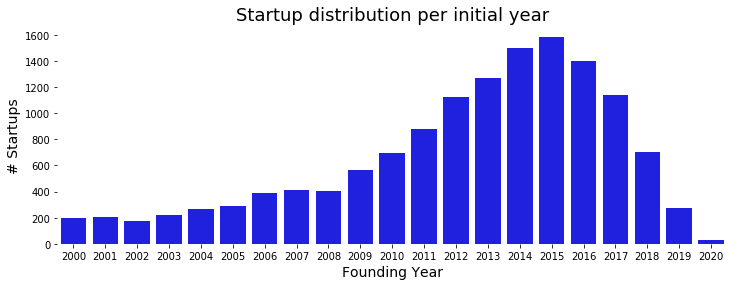

In [15]:
f, ax = plt.subplots(figsize=(12, 4))

#sns.set_theme(style="whitegrid")
sns.barplot(x=table_year.index, y=table_year.portfoliocompanyid, color="b")
ax.set_ylabel('# Startups', fontsize = 14)
ax.set_xlabel('Founding Year', fontsize = 14)
ax.set_title('Startup distribution per initial year', fontsize = 18)

sns.despine(left=True, bottom=True)


In [18]:
table_geo = pd.pivot_table(data_startup.drop_duplicates(["portfoliocompanyid"],keep="first"), 
                       values='portfoliocompanyid', index=['portfoliocompanystatecounty'], 
                       aggfunc=np.count_nonzero, fill_value=0)

new = pd.Series(['', 'AI', 'AK', 'AL', 'AR', 'AZ', 'AK', 'CA', 'CO', 'CT',
                    'CA', 'CO', 'DC', 'DE', 'FL', 'FL', 'FL', 'GA', 'HI',
                     'IA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                    'MI', 'MN', 'MO', 'MS', 'MT', 'MD', 'NC', 'ND', 'NE', 'NH', 'NJ',
                    'NM', 'NV', 'NY', 'NJ', 'OH', 'OK', 'OR', 'Oh', 'PA', 'RI',
                    'SC', 'SD', 'TN', 'TX', 'TX', 'UT', 'Ut', 'VA', 'VT', 'WA', 'WI',
                    'WV', 'WY', 'WA'])

table_geo = table_geo.set_index(new)
table_geo = table_geo.groupby(table_geo.index).agg({np.sum})


In [28]:
df_deals = data_startup.drop_duplicates(["portfoliocompanyid", "dealid"],keep="first")

df_deals.shape


(42163, 45)

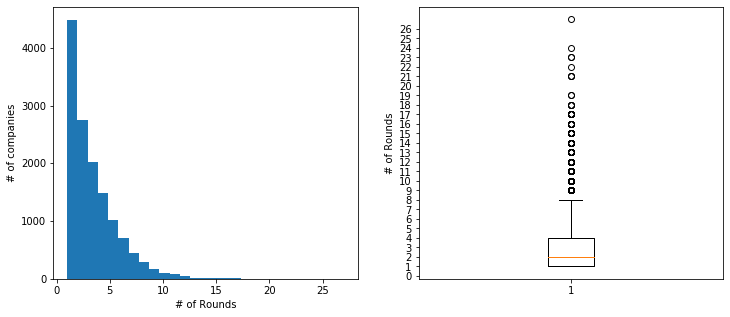

In [105]:
# george: want to see how the rounds distribution acorss companies
deal_cnt = df_deals.portfoliocompanyid.groupby(df_deals.portfoliocompanyid).count()
f, ax = plt.subplots(1,2,figsize=(12,5))
plt.yticks(range(27))
ax[0].hist(deal_cnt,27)
ax[0].set_xlabel('# of Rounds')
ax[0].set_ylabel('# of companies')
ax[1].boxplot(deal_cnt);
ax[1].set_ylabel('# of Rounds');

In [113]:
# george: to find the interval distribution between rounds of fundings
# gather data by companyid, compute time interval between each funding, store in a new column named 'diff'
# 
#df_deals.groupby(df_deals.portfoliocompanyid).sort_values(by=['dealdate']).head()
df_deals['diff'] = df_deals.sort_values(['portfoliocompanyid','dealdate']).groupby('portfoliocompanyid')['dealdate'].diff()
df_interval = df_deals[['portfoliocompanyid','stage','dealdate','diff']]

/Users/liwangzhi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [129]:
df_interval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28453 entries, 0 to 72795
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   portfoliocompanyid  28453 non-null  int32          
 1   stage               28453 non-null  object         
 2   dealdate            28453 non-null  datetime64[ns] 
 3   diff                28453 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), int32(1), object(1), timedelta64[ns](1)
memory usage: 1000.3+ KB


In [134]:
df_interval = df_interval.dropna(subset = ['diff'])
df_interval['month'] = round(df_interval['diff']/np.timedelta64(1, 'M'),1)
df_interval.head()

,portfoliocompanyid,stage,dealdate,diff,month
0,26178,Series D/Round 4,2006-09-26,278 days,9.1
1,26580,Series D/Round 4,2005-06-01,365 days,12.0
2,26635,Series D/Round 4,2008-03-24,181 days,5.9
5,30010,Series D/Round 4,2010-04-08,1947 days,64.0
6,30078,Series C/Round 3,2005-03-04,900 days,29.6


In [135]:
df_interval.sort_values(by=['portfoliocompanyid','dealdate'])

,portfoliocompanyid,stage,dealdate,diff,month
0,26178,Series D/Round 4,2006-09-26,278 days,9.1
13706,26178,Unspecified Round,2009-10-08,1108 days,36.4
13705,26178,Unspecified Round,2012-10-03,1091 days,35.8
13713,26580,Series B/Round 2,1999-11-01,638 days,21.0
13712,26580,Series C/Round 3,2002-05-01,912 days,30.0
...,...,...,...,...,...
72790,384278,Series A/Round 1,2020-07-21,31 days,1.0
72791,384285,Venture Debt,2019-01-28,264 days,8.7
72792,384285,Seed,2020-07-23,542 days,17.8
13700,384360,Unspecified Round,2020-06-01,77 days,2.5


In [158]:
#plt.hist(df_interval.iloc[df_interval.where(df_interval.month < 150)]);
round_name = ['Seed','Series A/Round 1','Series B/Round 2','Series C/Round 3','Series D/Round 4']
round_month = {x:[] for x in round_name}
for round_n in round_name:
    round_month[round_n] = df_interval.loc[(df_interval.month < 150) & (df_interval.stage == round_n)].month

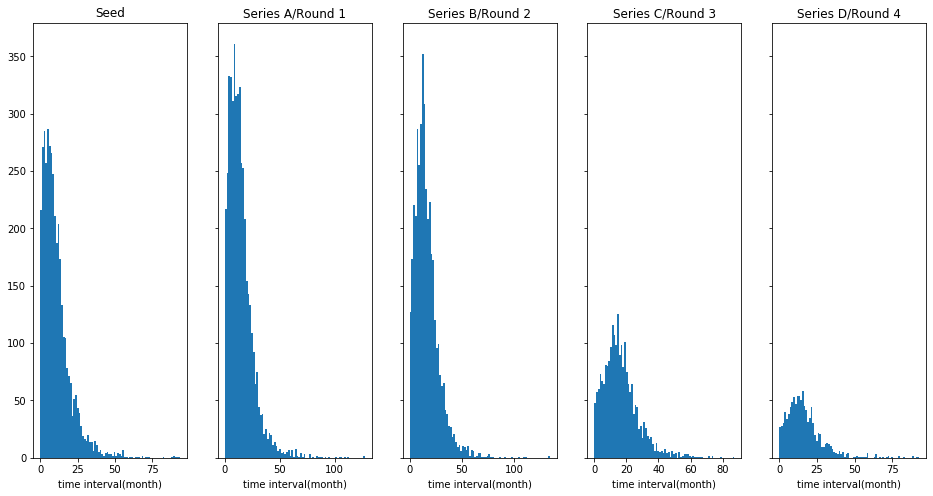

In [164]:
f, ax = plt.subplots(1,5,figsize=(16,8), sharey=True)
i = 0
for round_n in round_name:
    ax[i].hist(round_month[round_n],80);
    ax[i].set_title(round_n)
    ax[i].set_xlabel('time interval(month)')
    i = i +1

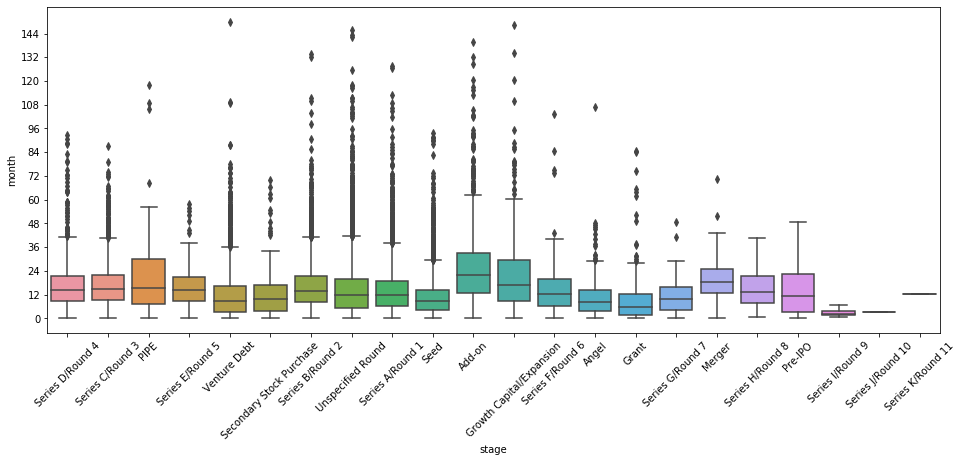

In [179]:
fig, ax = plt.subplots(figsize=(16,6))
ax = sns.boxplot(x="stage", y="month", data=df_interval.loc[(df_interval.month < 150)])
ax.set_yticks(np.arange(0,150,12))
plt.xticks(rotation=45);

### George: for the dependent variable, we can only focus on the seed and Series A/ round 1
Given that we web scraped the page around the time of startup’s seed funding round, things we can take as performance metrics for startups could be:

- value of the seed funding
- sum of first several rounds of fundings (but it seems there is a long interval)
- time interval between its seed and its first round of funding

In [85]:
# george: to see outliers
print('maximum number of rounds of fundings:',deal_cnt.max())
idx = deal_cnt.idxmax()
df_deals.loc[df_deals.portfoliocompanyid == idx].sort_values(by=['dealdate'])

maximum number of rounds of fundings: 27


,portfoliocompanyid,website,dealid,portfoliocompany,background,investorsbuyersfirms,portfoliocompanycountry,dealdescription,stage,dealdate,dealcurrency,dealsizecurrmn,dealsizeusdmn,portfoliocompanystatus,dealstatus,investorcountry,investorregion,investorcity,investorstatecounty,portfoliocompanyregion,portfoliocompanycity,portfoliocompanystatecounty,portfoliocompanywebsite,companyrevenuecurrmn,entryrevenuemultiple,ebitdacurrmn,entryebitdamultiple,investorsbuyersfunds,industryclassification,primaryindustry,subindustries,industryverticals,boughtfromsellersfirms,leadpartners,boardrepresentatives,dealsizeeurmn,acquiredshare,financialadvisorsbuyers,financialadvisorssellers,legaladvisorsbuyers,legaladvisorssellers,has_no_background,incyear,_merge,has_website
14402,61715,www.uber.com,V13779,"Uber Technologies, Inc.","Founded in 2009 and based in California, US, U...",Founder Collective,US,"In August 2009, Uber Technologies, Inc. raised...",Seed,2009-08-01,USD,0.20,0.20,Active,Completed,US,North America,Cambridge,MA,North America,San Francisco,CA,www.uber.com,NaN,NaN,NaN,NaN,Founder Collective I,Consumer Discretionary,Transportation Services,"Courier & Delivery Services, Car Hire Services...","E-commerce, Mobile Apps",,,,0.14,NaN,,,,,0,2009,matched (3),1
14377,61715,www.uber.com,V77,"Uber Technologies, Inc.","Founded in 2009 and based in California, US, U...","Founder Collective, First Round Capital, Lower...",US,"In October 2010, UberCab raised USD 1.25 milli...",Angel,2010-10-15,USD,1.25,1.25,Active,Completed,US,North America,"Cambridge, Philadelphia, Hermosa Beach","MA, PA, CA",North America,San Francisco,CA,www.uber.com,NaN,NaN,NaN,NaN,"Founder Collective I, Lowercase RT, First Roun...",Consumer Discretionary,Transportation Services,"Courier & Delivery Services, Car Hire Services...","E-commerce, Mobile Apps",,Chris Sacca,,0.90,NaN,,,,,0,2009,matched (3),1
14361,61715,www.uber.com,V8255,"Uber Technologies, Inc.","Founded in 2009 and based in California, US, U...","Benchmark Capital, First Round Capital, Lowerc...",US,"In February 2011, Uber Technologies, Inc. rais...",Series A/Round 1,2011-02-14,USD,11.00,11.00,Active,Completed,US,North America,"Woodside, Philadelphia, Hermosa Beach, Palo Al...","CA, PA",North America,San Francisco,CA,www.uber.com,NaN,NaN,NaN,NaN,"Benchmark Capital Partners VII, First Round Ca...",Consumer Discretionary,Transportation Services,"Courier & Delivery Services, Car Hire Services...","E-commerce, Mobile Apps",,"Bill Gurley, Rob Hayes, Alfred Lin",Bill Gurley,8.03,NaN,,,,,0,2009,matched (3),1
14386,61715,www.uber.com,V13781,"Uber Technologies, Inc.","Founded in 2009 and based in California, US, U...","Menlo Ventures, Lowercase Capital, Benchmark C...",US,"In December 2011, Uber Technologies, Inc. rais...",Series B/Round 2,2011-12-07,USD,37.25,37.25,Active,Completed,US,North America,"Menlo Park, Hermosa Beach, Woodside, New York,...","CA, NY, PA, Utah",North America,San Francisco,CA,www.uber.com,NaN,NaN,NaN,NaN,"Benchmark Capital Partners VII, CrunchFund I, ...",Consumer Discretionary,Transportation Services,"Courier & Delivery Services, Car Hire Services...","E-commerce, Mobile Apps",,"Shawn Carolan, Sunil Raman",,27.84,NaN,,,,,0,2009,matched (3),1
14366,61715,www.uber.com,V48330,"Uber Technologies, Inc.","Founded in 2009 and based in California, US, U...","Benchmark Capital, GV, TPG",US,"In August 2013, Uber Technologies, Inc. raised...",Series C/Round 3,2013-08-01,USD,361.20,361.20,Active,Completed,US,North America,"Woodside, Mountain View, Fort Worth","CA, TX",North America,San Francisco,CA,www.uber.com,NaN,NaN,NaN,NaN,"Benchmark Capital Partners VII, TPG Growth II",Consumer Discretionary,Transportation Services,"Courier & Delivery Services, Car Hire Services...","E-commerce, Mobile Apps",,"David Krane, David Bonderman",David Bonderman,270.83,NaN,,,Davis Polk & Wardwell,,0,2009,matched (3),1
14390,61715,www.uber.com,V64777,"Uber Technologies, Inc.","Founded in 2009 and based in California, US, U...","W

In [29]:
table_stage = pd.pivot_table(data_startup.drop_duplicates(["portfoliocompanyid", "dealid"],keep="first"), index = ['stage'],
                       values='dealsizeusdmn', 
                       aggfunc={np.count_nonzero,np.sum, np.mean}, fill_value=0)
table_stage

,count_nonzero,mean,sum
stage,,,
Add-on,1062,206.398828,26419.05
Angel,828,1.061098,705.63
Grant,373,2.244762,707.10
Growth Capital/Expansion,594,35.046645,16506.97
Merger,39,82.223333,246.67
PIPE,76,78.016462,5071.07
Pre-IPO,12,39.495833,473.95
Secondary Stock Purchase,92,406.625862,11792.15
Seed,9797,2.485661,19077.45


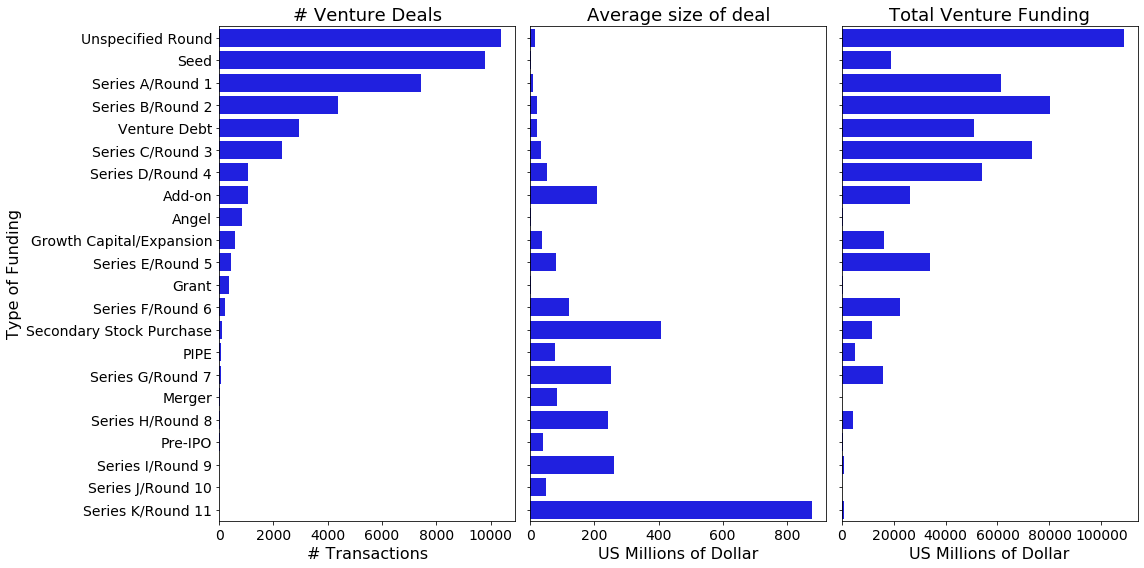

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,8), sharey=True)

table_stage = table_stage.sort_values('count_nonzero',ascending=False)
#table_stage2 = table_stage[table_stage.index !='Add-on']


sns.barplot(y=table_stage.index, x=table_stage.iloc[:,0], color="b", ax =ax1)
sns.barplot(y=table_stage.index, x=table_stage.iloc[:,1], color="b", ax =ax2)
sns.barplot(y=table_stage.index, x=table_stage.iloc[:,2], color="b", ax =ax3)


ax1.set_ylabel('Type of Funding', fontsize = 16)
ax1.set_xlabel('# Transactions', fontsize = 16)
ax1.set_title('# Venture Deals', fontsize = 18)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax2.set_ylabel('', fontsize = 16)
ax2.set_xlabel('US Millions of Dollar', fontsize = 16)
ax2.set_title('Average size of deal', fontsize = 18)
ax2.tick_params(axis='x', labelsize=14)

ax3.set_ylabel('', fontsize = 16)
ax3.set_xlabel('US Millions of Dollar', fontsize = 16)
ax3.set_title('Total Venture Funding', fontsize = 18)
ax3.tick_params(axis='x', labelsize=14)

plt.tight_layout()

In [31]:
table_fund_geo_comp = pd.pivot_table(data_startup.drop_duplicates(["portfoliocompanyid", "dealid"],keep="first"), index = ['portfoliocompanystatecounty'],
                       values='dealsizeusdmn', 
                       aggfunc={np.count_nonzero,np.sum}, fill_value=0)

new = pd.Series(['', 'AI', 'AK', 'AL', 'AR', 'AZ', 'AK', 'CA', 'CO', 'CT',
                    'CA', 'CO', 'DC', 'DE', 'FL', 'FL', 'FL', 'GA', 'HI',
                     'IA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                    'MI', 'MN', 'MO', 'MS', 'MT', 'MD', 'NC', 'ND', 'NE', 'NH', 'NJ',
                    'NM', 'NV', 'NY', 'NJ', 'OH', 'OK', 'OR', 'Oh', 'PA', 'RI',
                    'SC', 'SD', 'TN', 'TX', 'TX', 'UT', 'Ut', 'VA', 'VT', 'WA', 'WI',
                    'WV', 'WY', 'WA'])

table_fund_geo_comp = table_fund_geo_comp.set_index(new)
table_fund_geo_comp = table_fund_geo_comp.groupby(table_fund_geo_comp.index).agg({np.sum})

In [32]:
table_geo_tot = table_geo.join(table_fund_geo_comp)
table_geo_tot.columns =['startups', 'deals', 'amt_deals']
table_geo_tot = table_geo_tot.sort_values('startups',ascending=False)

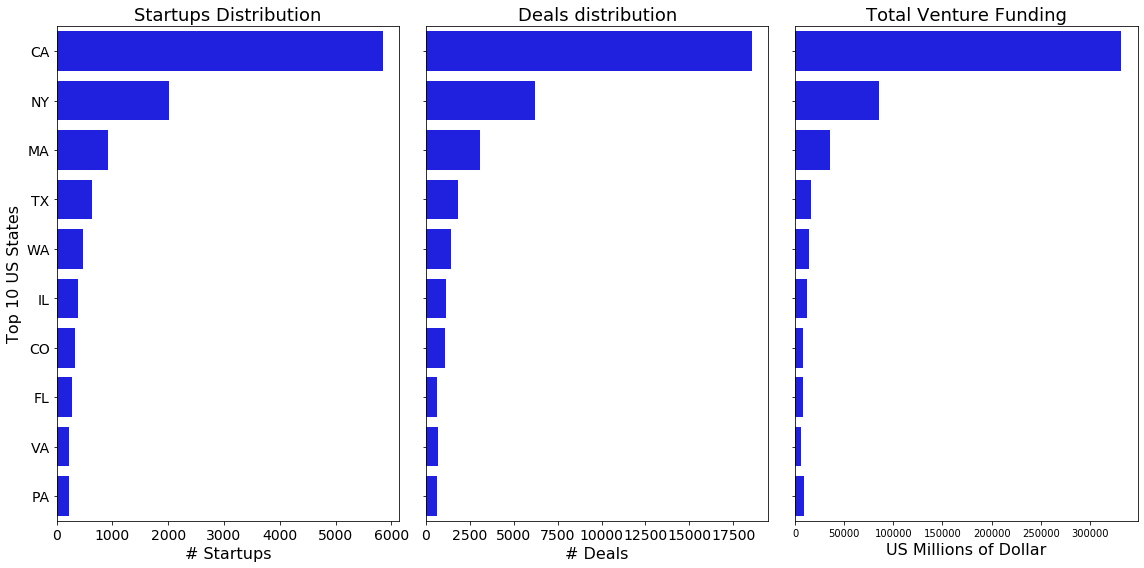

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,8), sharey=True)

sns.barplot(y=table_geo_tot.index[0:10], x=table_geo_tot.iloc[0:10,0], color="b", ax =ax1)
sns.barplot(y=table_geo_tot.index[0:10], x=table_geo_tot.iloc[0:10,1], color="b", ax =ax2)
sns.barplot(y=table_geo_tot.index[0:10], x=table_geo_tot.iloc[0:10,2], color="b", ax =ax3)


ax1.set_ylabel('Top 10 US States', fontsize = 16)
ax1.set_xlabel('# Startups', fontsize = 16)
ax1.set_title('Startups Distribution', fontsize = 18)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax2.set_ylabel('', fontsize = 16)
ax2.set_xlabel('# Deals', fontsize = 16)
ax2.set_title('Deals distribution', fontsize = 18)
ax2.tick_params(axis='x', labelsize=14)

ax3.set_ylabel('', fontsize = 16)
ax3.set_xlabel('US Millions of Dollar', fontsize = 16)
ax3.set_title('Total Venture Funding', fontsize = 18)
ax2.tick_params(axis='x', labelsize=14)

plt.tight_layout()

In [34]:
table_fund_ind = pd.pivot_table(data_startup.drop_duplicates(["portfoliocompanyid", "dealid"],keep="first"), index = ['industryclassification'],
                       values='dealsizeusdmn', 
                       aggfunc={np.count_nonzero,np.sum}, fill_value=0)

table_fund_ind

,count_nonzero,sum
industryclassification,,
Business Services,1913,21042.44
Consumer Discretionary,4437,89479.15
Energy & Utilities,845,20760.43
Financial & Insurance Services,2345,55431.57
Healthcare,2490,38248.01
Industrials,469,14102.79
Information Technology,28512,320142.92
Raw Materials & Natural Resources,194,2311.68
Real Estate,68,15130.91


In [35]:
table_ind_comp = pd.pivot_table(data_startup.drop_duplicates(["portfoliocompanyid"],keep="first"), index = ['industryclassification'],
                       values='dealsizeusdmn', 
                       aggfunc={np.count_nonzero}, fill_value=0)

table_ind_comp.columns = ['startups']
table_ind_comp

,startups
industryclassification,
Business Services,600
Consumer Discretionary,1610
Energy & Utilities,214
Financial & Insurance Services,741
Healthcare,952
Industrials,176
Information Technology,9038
Raw Materials & Natural Resources,68
Real Estate,25


In [36]:
table_ind_tot = table_ind_comp.join(table_fund_ind)
table_ind_tot.columns = ['startups', 'deals', 'amt_deals']
table_ind_tot = table_ind_tot.sort_values('startups',ascending=False)

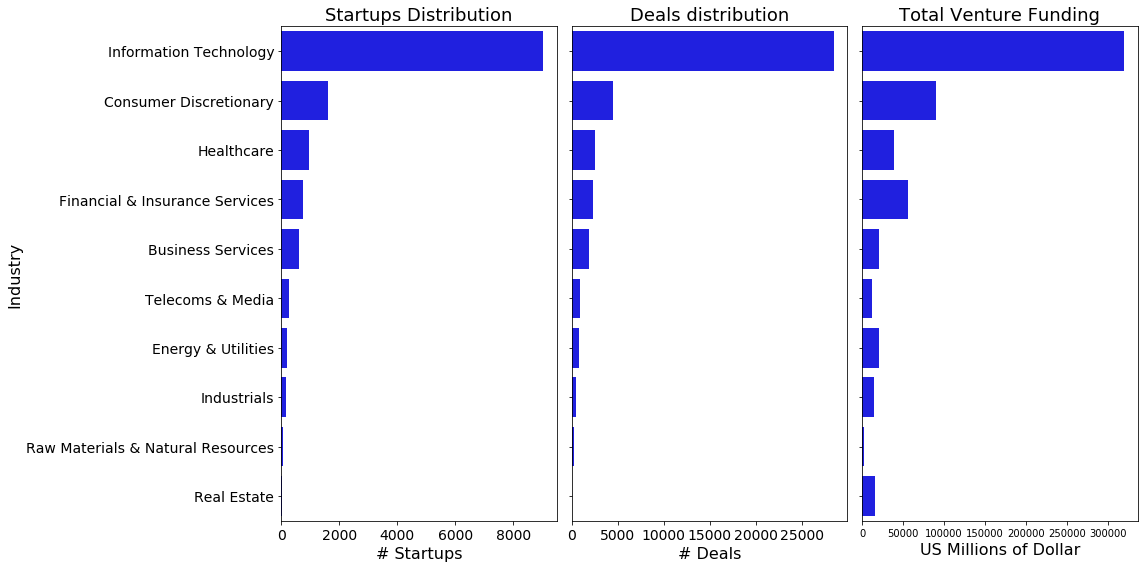

In [37]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,8), sharey=True)

sns.barplot(y=table_ind_tot.index, x=table_ind_tot.iloc[:,0], color="b", ax =ax1)
sns.barplot(y=table_ind_tot.index, x=table_ind_tot.iloc[:,1], color="b", ax =ax2)
sns.barplot(y=table_ind_tot.index, x=table_ind_tot.iloc[:,2], color="b", ax =ax3)


ax1.set_ylabel('Industry', fontsize = 16)
ax1.set_xlabel('# Startups', fontsize = 16)
ax1.set_title('Startups Distribution', fontsize = 18)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax2.set_ylabel('', fontsize = 16)
ax2.set_xlabel('# Deals', fontsize = 16)
ax2.set_title('Deals distribution', fontsize = 18)
ax2.tick_params(axis='x', labelsize=14)

ax3.set_ylabel('', fontsize = 16)
ax3.set_xlabel('US Millions of Dollar', fontsize = 16)
ax3.set_title('Total Venture Funding', fontsize = 18)
ax2.tick_params(axis='x', labelsize=14)

plt.tight_layout()

## EDAV Public Companies Database

In [38]:
data_public.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22333 entries, 0 to 22332
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ÿþmark                            22333 non-null  object 
 1   companyname                       22333 non-null  object 
 2   countryisocode                    22333 non-null  object 
 3   nacerev2corecode4digits           22238 non-null  float64
 4   conscode                          22333 non-null  object 
 5   lastavailyear                     16320 non-null  float64
 6   operatingrevenueturnoverthusdlas  22333 non-null  object 
 7   numberofemployeeslastavailyr      22333 non-null  object 
 8   bvdindependenceindicator          22333 non-null  object 
 9   guoname                           22333 non-null  object 
 10  ipodate                           22333 non-null  object 
 11  tickersymbol                      22333 non-null  object 
 12  webs

In [39]:
data_public.tail(5)

,ÿþmark,companyname,countryisocode,nacerev2corecode4digits,conscode,lastavailyear,operatingrevenueturnoverthusdlas,numberofemployeeslastavailyr,bvdindependenceindicator,guoname,ipodate,tickersymbol,websiteaddress,headquarterswebsiteaddress,marketcapitalisationmusdlastavai,marketcapitalisationmusd2020,marketcapitalisationmusd2019,marketcapitalisationmusd2018,marketcapitalisationmusd2017,marketcapitalisationmusd2016,marketcapitalisationmusd2015,marketcapitalisationmusd2014,marketcapitalisationmusd2013,marketcapitalisationmusd2012,marketcapitalisationmusd2011,marketcapitalisationmusd2010,marketcapitalisationmusd2009,marketcapitalisationmusd2008,marketcapitalisationmusd2007,marketcapitalisationmusd2006,marketcapitalisationmusd2005,netprofitthusdlastavailyr,netprofitthusd2020,netprofitthusd2019,netprofitthusd2018,netprofitthusd2017,netprofitthusd2016,netprofitthusd2015,netprofitthusd2014,netprofitthusd2013,netprofitthusd2012,netprofitthusd2011,naics2017corecode4digits,ussiccorecode3digits,descriptionandhistory,originallanguageoftradedescripti,first
22328,2546,"ZYNEX, INC.",US,2660.0,C1,2019.0,"45,472",283,B+,"ZYNEX, INC.",29/02/2012,ZYXI,www.zynex.com,,257.69,n.a.,257.69,97.87,104.51,9.38,14.17,5.16,11.52,21.79,20.96,18.36,n.a.,n.a.,n.a.,n.a.,n.a.,"9,492",n.a.,"9,492","9,552","7,365",69,"-2,911","-6,199","-7,301","1,553","1,564",3345.0,384.0,"Zynex, Inc., incorporated on December 31, 2001...",,1.0
22329,625,ZYNGA INC.,US,6311.0,C1,2019.0,"1,321,659","1,883",A+,ZYNGA INC.,31/12/2013,ZNGA,www.zynga.com,,"5,789.05",n.a.,"5,789.05","3,387.20","3,127.15","1,992.33","2,140.80","2,041.40","2,506.81","1,377.91",n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,"41,925",n.a.,"41,925","15,457","26,639","-108,173","-121,510","-225,900","-36,982","-209,448","-404,316",5179.0,737.0,"Zynga Inc., incorporated on October 26, 2007, ...",,1.0
22330,5144,"ZYROX MINING INTERNATIONAL, INC.",US,2219.0,LF,2019.0,220,3,U,,24/10/2005,ZYRX,www.dissolvingplastic.com,,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,3262.0,306.0,,,1.0
22331,3840,ZYTO CORP,US,3250.0,LF,2019.0,"4,095",30,B-,ZYTO CORP,,ZYTO,www.zyto.com,,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,3391.0,384.0,,,1.0
22332,5059,"ZZLL INFORMATION TECHNOLOGY, INC.",US,7911.0,C1,2019.0,277,n.a.,B+,,29/12/2003,ZZLL,www.zzlliti.com,,2.43,n.a.,2.43,4.06,7.26,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,453,n.a.,453,-121,-925,-236,-247,-365,-241,-191,89,5615.0,472.0,"ZZLL Information Technology, Inc., formerly Gr...",,1.0


In [40]:
data_public.duplicated().value_counts()

False    22333
dtype: int64

In [41]:
d = data_public.ipodate==''
d.value_counts()

False    11502
True     10831
Name: ipodate, dtype: int64

In [42]:
data_public['ipoyear'] = pd.DatetimeIndex(data_public['ipodate']).year

data_public['gp_ipoyear']=['+1999' if x <2000  else  'Mssg' if np.isnan(x) else str(int(x)) for x in data_public.ipoyear ]

In [43]:
table_year = pd.pivot_table(data_public,
                       values='countryisocode', index=['gp_ipoyear'], 
                       aggfunc=np.count_nonzero, fill_value=0)
table_year

,countryisocode
gp_ipoyear,
+1999,4515
2000,495
2001,295
2002,268
2003,255
2004,422
2005,421
2006,442
2007,442


AttributeError: module 'seaborn' has no attribute 'set_theme'

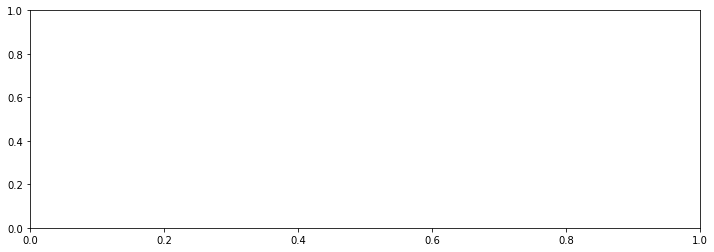

In [44]:
f, ax = plt.subplots(figsize=(12, 4))

sns.set_theme(style="whitegrid")
sns.barplot(x=table_year.index[1:22], y=table_year.countryisocode[1:22], color="b")
ax.set_ylabel('# Public Companies', fontsize = 14)
ax.set_xlabel('IPO Year', fontsize = 14)
ax.set_title('Startup distribution per IPO year', fontsize = 18)

sns.despine(left=True, bottom=True)

In [45]:
data_public['naic'] = ['-99' if np.isnan(x) else str(int(x))[0:2] for x in data_public.naics2017corecode4digits]

In [46]:
dict_naic={'11': ['Agriculture, Forestry, Fishing and Hunting'],
'21':['Mining, Quarrying, and Oil and Gas Extraction'],
'22':['Utilities'],
'23':['Construction'],
'31':['Manufacturing'],
'32':['Manufacturing'],
'33':['Manufacturing'],
'42':['Wholesale Trade'],
'44':['Retail Trade'],
'45':['Retail Trade'],
'48':['Transportation and Warehousing'],
'49':['Transportation and Warehousing'],
'51':['Information'],
'52':['Finance and Insurance'],
'53':['Real Estate and Rental and Leasing'],
'54':['Professional, Scientific, and Technical Services'],
'55':['Management of Companies and Enterprises'],
'56':['Administrative and Support and Waste Management and Remediation Services'],
'61':['Educational Services'],
'62':['Health Care and Social Assistance'],
'71':['Arts, Entertainment, and Recreation'],
'72':['Accommodation and Food Services'],
'81':['Other Services (except Public Administration)'],
'92':['Public Administration'],
'-99':['Mssg']}

df_naic = pd.DataFrame.from_dict(dict_naic, orient='index')
df_naic.columns = ['description']
df_naic['naic'] = df_naic.index
df_naic

,description,naic
11,"Agriculture, Forestry, Fishing and Hunting",11
21,"Mining, Quarrying, and Oil and Gas Extraction",21
22,Utilities,22
23,Construction,23
31,Manufacturing,31
32,Manufacturing,32
33,Manufacturing,33
42,Wholesale Trade,42
44,Retail Trade,44
45,Retail Trade,45


In [47]:
data_complete = pd.merge(data_public, df_naic, on='naic', how='outer')
data_complete.head()

,ÿþmark,companyname,countryisocode,nacerev2corecode4digits,conscode,lastavailyear,operatingrevenueturnoverthusdlas,numberofemployeeslastavailyr,bvdindependenceindicator,guoname,ipodate,tickersymbol,websiteaddress,headquarterswebsiteaddress,marketcapitalisationmusdlastavai,marketcapitalisationmusd2020,marketcapitalisationmusd2019,marketcapitalisationmusd2018,marketcapitalisationmusd2017,marketcapitalisationmusd2016,marketcapitalisationmusd2015,marketcapitalisationmusd2014,marketcapitalisationmusd2013,marketcapitalisationmusd2012,marketcapitalisationmusd2011,marketcapitalisationmusd2010,marketcapitalisationmusd2009,marketcapitalisationmusd2008,marketcapitalisationmusd2007,marketcapitalisationmusd2006,marketcapitalisationmusd2005,netprofitthusdlastavailyr,netprofitthusd2020,netprofitthusd2019,netprofitthusd2018,netprofitthusd2017,netprofitthusd2016,netprofitthusd2015,netprofitthusd2014,netprofitthusd2013,netprofitthusd2012,netprofitthusd2011,naics2017corecode4digits,ussiccorecode3digits,descriptionandhistory,originallanguageoftradedescripti,first,ipoyear,gp_ipoyear,naic,description
0,5908,1-800 ATTORNEY INC,US,5819.0,C1,2001.0,"6,891",71,U,,17/05/1996,ATTY,www.1800attorney.co,,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,"-1,845",n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,5111.0,274.0,"1-800-ATTORNEY, Inc., incorporated on Septembe...",,1.0,1996.0,+1999,51,Information
1,4264,12 RETECH CORPORATION,US,5829.0,C1,2019.0,"1,629",n.a.,D,MR ANGELO PONZETTA,25/09/2015,RETC,www.12retech.com,,0.06,n.a.,0.06,0.69,14.99,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,"-12,147",n.a.,"-12,147","-8,767","-1,419",-46,-42,-5,n.a.,n.a.,n.a.,5112.0,737.0,"12 Retech Corporation., incorporated on Septem...",,1.0,2015.0,2015,51,Information
2,5503,"2-TRACK GLOBAL, INC.",US,2651.0,C1,2011.0,77,1,U,"2-TRACK GLOBAL, INC.",,TOTG,www.2-trackglobal.com,,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,-31,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,-31,5112.0,381.0,"2-Track Global, Inc. (2-Track), incorporated o...",,1.0,NaN,Mssg,51,Information
3,6533,3D PIONEER SYSTEMS INC.,US,5829.0,C1,2013.0,0,n.a.,A-,,21/09/2012,DPSM,www.3d-pioneer.com,,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,-45,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,-45,-1,-1,5112.0,737.0,"3D Pioneer Systems, Inc., formerly Mobile Gami...",,1.0,2012.0,2012,51,Information
4,1851,3D SYSTEMS CORPORATION,US,5829.0,C1,2019.0,"629,094","2,472",A+,3D SYSTEMS CORPORATION,26/03/2011,DDD,www.3dsystems.com,,"1,036.18",n.a.,"1,036.18","1,161.22",983.77,"1,493.26",973.96,"3,655.71","9,551.42","3,043.08",727.76,732.67,n.a.,n.a.,n.a.,n.a.,n.a.,"-69,880",n.a.,"-69,880","-45,505","-66,191","-38,419","-655,492","11,637","44,107","38,941","35,420",5112.0,737.0,"3D Systems Corporation, incorporated on May 14...",,1.0,2011.0,2011,51,Information


In [48]:
table_ind = pd.pivot_table(data_complete,
                       values='countryisocode', index=['description'], 
                       aggfunc=np.count_nonzero, fill_value=0)
table_ind = table_ind.sort_values('countryisocode',ascending=False)
table_ind

,countryisocode
description,
Finance and Insurance,9035
Manufacturing,4544
Information,1785
"Professional, Scientific, and Technical Services",1633
"Mining, Quarrying, and Oil and Gas Extraction",951
Management of Companies and Enterprises,735
Real Estate and Rental and Leasing,590
Wholesale Trade,532
Retail Trade,461


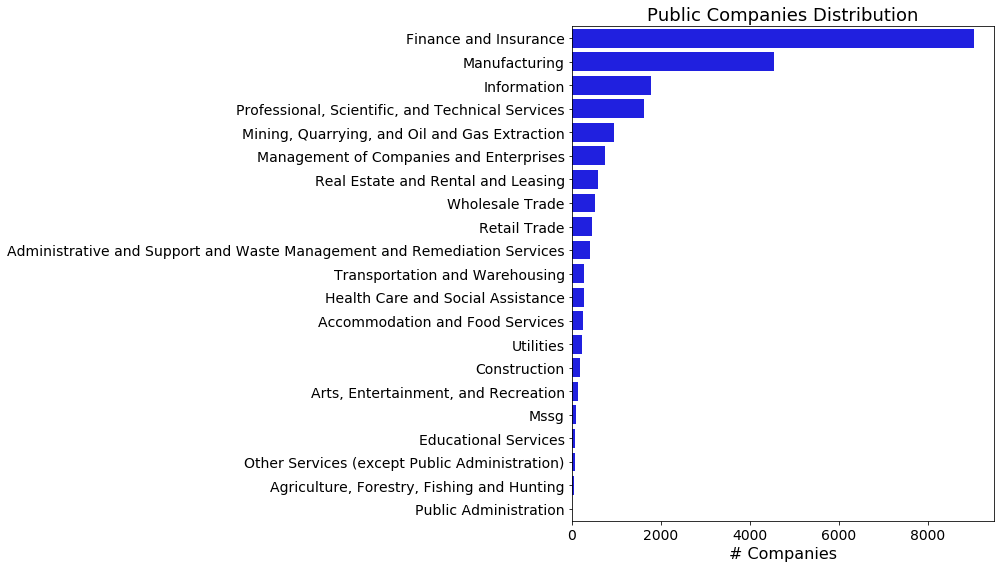

In [49]:
f, ax1 = plt.subplots(1,1,figsize=(14,8))

sns.barplot(y=table_ind.index, x=table_ind.iloc[:,0], color="b", ax =ax1)

ax1.set_ylabel('', fontsize = 1)
ax1.set_xlabel('# Companies', fontsize = 16)
ax1.set_title('Public Companies Distribution', fontsize = 18)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

plt.tight_layout()

In [50]:
data_complete['num_marketcap']=[float('NaN') if x== 'n.a.' else float(x.replace(',', '')) for x in data_complete.marketcapitalisationmusdlastavai]
np.percentile(data_complete.num_marketcap[data_complete.num_marketcap.isna()==False],95)

14395.9375

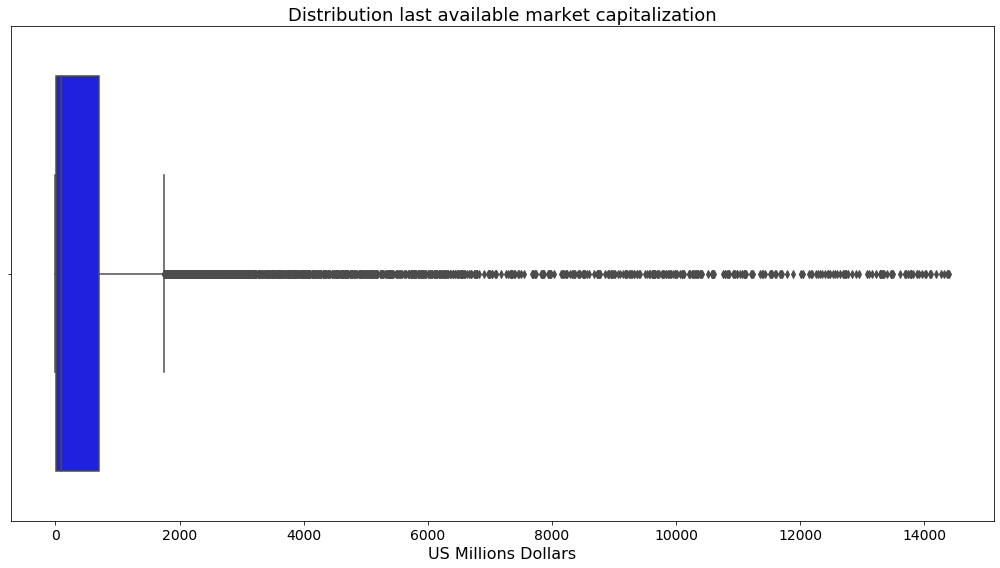

In [51]:
f, ax1 = plt.subplots(1,1,figsize=(14,8))

sns.boxplot(data=data_complete[(data_complete.num_marketcap.isna()==False) & (data_complete.num_marketcap < 14395.9375)], x="num_marketcap", ax=ax1, color='b')

ax1.set_xlabel('US Millions Dollars', fontsize = 16)
ax1.set_title('Distribution last available market capitalization', fontsize = 18)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

plt.tight_layout()